# ADABOOST CLASSIFIER ALGORITHEM

In [1]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\SPIRO-JAVA NEW\AppData\Local\Temp\ipykernel_8896\3083798723.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Avoid unnecessary warnings, (EX: software updates, version mismatch, and so on.)
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('risk.csv')



In [4]:
# Check the top5 values
df.head()

,outcome,age,gendera,BMI,hypertensive,diabetes,depression,heart rate,Systolic blood pressure,Diastolic blood pressure,...,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Magnesium ion,PH,Lactic acid,PCO2
0,2.0,72.0,1.0,37.588179,0.0,1.0,0.0,68.837838,155.866667,68.333333,...,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,2.618182,7.230,0.5,40.0
1,2.0,75.0,2.0,NaN,0.0,0.0,0.0,101.370370,140.000000,65.000000,...,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,1.887500,7.225,0.5,78.0
2,2.0,83.0,2.0,26.572634,0.0,0.0,0.0,72.318182,135.333333,61.375000,...,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,2.157143,7.268,0.5,71.5
3,2.0,43.0,2.0,83.264629,0.0,0.0,0.0,94.500000,126.400000,73.200000,...,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,1.942857,7.370,0.6,75.0
4,2.0,75.0,2.0,31.824842,1.0,0.0,0.0,67.920000,156.560000,58.120000,...,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,1.650000,7.250,0.6,50.0


In [5]:
# Remove the null value
df=df.dropna()

In [6]:
# Check the columns of dataset
df.columns

Index(['outcome', 'age', 'gendera', 'BMI', 'hypertensive', 'diabetes',
       'depression', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Magnesium ion', 'PH', 'Lactic acid',
       'PCO2'],
      dtype='object')

In [7]:
# Check the top5 values
df.head()

,outcome,age,gendera,BMI,hypertensive,diabetes,depression,heart rate,Systolic blood pressure,Diastolic blood pressure,...,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Magnesium ion,PH,Lactic acid,PCO2
0,2.0,72.0,1.0,37.588179,0.0,1.0,0.0,68.837838,155.866667,68.333333,...,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,2.618182,7.230,0.5,40.0
2,2.0,83.0,2.0,26.572634,0.0,0.0,0.0,72.318182,135.333333,61.375000,...,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,2.157143,7.268,0.5,71.5
3,2.0,43.0,2.0,83.264629,0.0,0.0,0.0,94.500000,126.400000,73.200000,...,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,1.942857,7.370,0.6,75.0
4,2.0,75.0,2.0,31.824842,1.0,0.0,0.0,67.920000,156.560000,58.120000,...,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,1.650000,7.250,0.6,50.0
5,2.0,76.0,1.0,24.262293,1.0,0.0,0.0,74.181818,118.100000,52.950000,...,26.625000,98.333333,4.075000,136.250000,8.466667,96.750000,1.771429,7.310,0.6,65.5


In [8]:
# Remove the duplicate values
df=df.drop_duplicates()

In [9]:
x1 = df.drop(labels='outcome', axis=1)
y1 = df.loc[:,'outcome']

In [10]:
# This process execute to balanced the datasets features.
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0.0: 529, 1.0: 96, 2.0: 16})
OVER SAMPLING DATA COUNT  :  Counter({2.0: 529, 0.0: 529, 1.0: 529})


In [11]:
# Split the datasets into two parts like trainng and testing variable.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  1269
NUMBER OF TEST DATASET      :  318
TOTAL NUMBER OF DATASET    :  1587


In [12]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  1269
NUMBER OF TEST DATASET      :  318
TOTAL NUMBER OF DATASET    :  1587


In [13]:
# Implement Adaboost classifier algorithm learning patterns
from sklearn.ensemble import AdaBoostClassifier

In [14]:
ABC = AdaBoostClassifier()
# Fit is the training function for this algorithm.
ABC.fit(x_train,y_train)

AdaBoostClassifier()

In [15]:
# Predict is the test function for this algorithm
predicted = ABC.predict(x_test)

In [16]:
# Check classification report for this algorithm
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF ADABOOST CLASSIFIER:\n\n',cr)

THE CLASSIFICATION REPORT OF ADABOOST CLASSIFIER:

               precision    recall  f1-score   support

         0.0       0.50      0.79      0.61       106
         1.0       0.52      0.21      0.30       106
         2.0       0.98      1.00      0.99       106

    accuracy                           0.67       318
   macro avg       0.67      0.67      0.63       318
weighted avg       0.67      0.67      0.63       318



In [17]:
# Check the confusion matrix for this algorithms.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:


 [[ 84  20   2]
 [ 84  22   0]
 [  0   0 106]]


In [18]:
# Check the cross value score of this algorithm.
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(ABC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [66.98113208 68.23899371 71.60883281 63.40694006 65.61514196]


In [19]:
# Check the accuracy score of this algorithms.
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF ADABOOST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF ADABOOST CLASSIFIER IS : 66.66666666666666


In [20]:
# Check the hamming loss of this algorithm.
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF ADABOOST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF ADABOOST CLASSIFIER IS : 33.33333333333333


THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:


[[ 84  20   2]
 [ 84  22   0]
 [  0   0 106]]


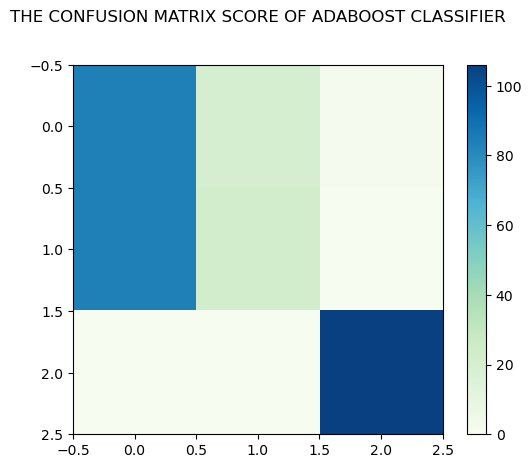

In [21]:
# Plot a Confusion matrix for this algorithms.
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER\n\n', cmap=plt.cm.GnBu):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF ADABOOST CLASSIFIER:\n\n')
print(cm)
plot_confusion_matrix(cm)

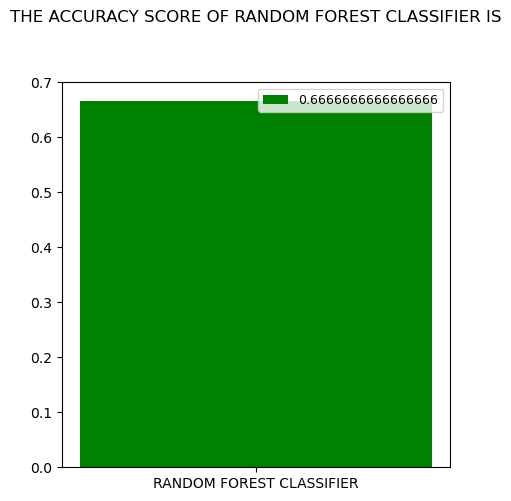

In [22]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="RANDOM FOREST CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("green"))
    plt.title("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()